## Integration of SIR model for epidemic

 Based on  W. O. Kermack and A. G. McKendrick model 
 
 References:     
 -Steven H. Strogatz, Nonlinear Dynamics and Chaos  
 -https://en.wikipedia.org/wiki/Mathematical_modelling_of_infectious_disease


Wendson Barbosa  
Postdoctoral Researcher  
Department of Physics   
Physics Research Building Room 4128  
191 W. Woodruff Ave, Columbus, OH 43210  
Physics Department phone: 614-292-5713   
desabarbosa.1@osu.edu  

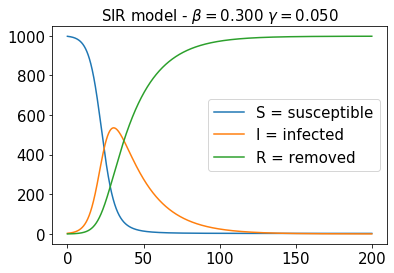

In [144]:
#Import Modules/Libraries
import matplotlib.pyplot as plt  #Plot Graphics
import numpy as np               #Facilitates math and operations in large matrices and arrays
import scipy                     #Powerful library for science - Here we use for integration 
from scipy import integrate
from scipy.signal import argrelextrema

#Equation Definition - SIR model
def SIR(t,y):
    
    dS_dt = -beta*y[0]*y[1]/(y[0]+y[1]+y[2]) 
    dI_dt = beta*y[0]*y[1]/(y[0]+y[1]+y[2])  - gamma*y[1]
    dR_dt = gamma*y[1]
    
    return[dS_dt,dI_dt,dR_dt]

# S = y[0] ==> Number of individuals not yet infected
# I = y[1] ==> Number of individuals infected
# R = y[2] ==> Number of individuals recovered or killed by the disease 
# beta = Infection Rate
# gamma = Recovery Rate

y0 = [997,3,0] # Array of initial conditions S0, I0, R0

#Integration Function for parameter passing
def solution (beta,gamma):
    result = scipy.integrate.solve_ivp(SIR, (0,200), y0, max_step = 0.05, method='RK45')
    return (result,beta,gamma)


#Example:
beta = 0.3
gamma=0.05
SIR_solution = solution(beta,gamma)

plt.plot(SIR_solution[0].t, SIR_solution[0].y[0], label = "S = susceptible")
plt.plot(SIR_solution[0].t, SIR_solution[0].y[1], label = "I = infected")
plt.plot(SIR_solution[0].t, SIR_solution[0].y[2], label = "R = removed")
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.legend(fontsize = 15)
plt.title ("SIR model - $\\beta=$%.3f $\\gamma=$%.3f" % (SIR_solution[1],SIR_solution[2]), fontsize = 15)
plt.show()


In [116]:
#----------------------------- 
# Parameters Variation
#-----------------------------

#Some list definitions (can be transformed in numpy.arrays - it's only another way to store values) 
Peak = []
Complete_Solution = []
beta_array = []

#Varying beta from 0.2 to 1.0
for beta in np.arange(0.2,1.1,0.1):
    
    Peak_beta = []
    beta_array.append(beta)
    Complete_Solution_beta = []
    gamma_array = []
    
    #Varying gamma from 0.01 to 0.1
    for gamma in np.arange(0.01,0.11,0.01):
        
        #Solution for each (beta,gamma)
        SIR_solution = solution(beta,gamma) 
        Complete_Solution_beta.append(SIR_solution[0])
        #Peak for each solution
        I_max = SIR_solution[0].y[1][argrelextrema(SIR_solution[0].y[1], np.greater)[0]] # get first maximum
        Peak_beta.append(I_max)
        
        gamma_array.append(gamma)
    
    Peak.append(Peak_beta)
    Complete_Solution.append(Complete_Solution_beta)

Peak = np.hstack(Peak) #Array manipulation for plotting

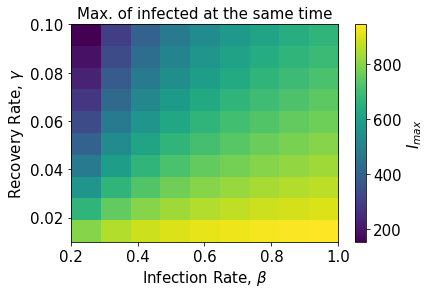

In [189]:
#Plot a colormap for maximum number of individuals infected   
plt.imshow(Peak,aspect='auto',extent = [0.2,1,0.1,0.01])#extent=[0.01,0.1,1,0.2])
#plt.colorbar(label="$I_{max}$").set_label(size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
cb=plt.colorbar(); cb.set_label(label="$I_{max}$",size=15); cb.ax.tick_params(labelsize=15)
plt.title("Max. of infected at the same time", fontsize=15)
plt.xlabel("Infection Rate, $\\beta$",fontsize=15)
plt.ylabel("Recovery Rate, $\\gamma$",fontsize=15)
plt.ylim(0.01,0.1)
plt.show()

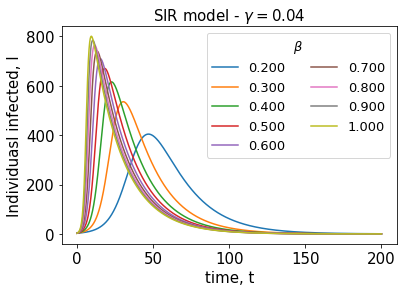

In [178]:
#Plots for gamma = 0.04 (second index=4 in the "Complete_Solutio" array), varying beta ==> Flattering the curve
for i in range (len(Complete_Solution)):
    plt.plot(Complete_Solution[i][4].t, Complete_Solution[i][4].y[1], label = "%.3f" % beta_array[i])
plt.legend(ncol=2,fontsize=13).set_title("$\\beta$",prop={'size':13})
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.title ("SIR model - $\\gamma=$0.04", fontsize=15 )
plt.xlabel("time, t", fontsize=15 )
plt.ylabel("Individuasl infected, I", fontsize=15 )
plt.show()